#### TP4: Modelos cinematicos, simulaciones simples

Ejemplo simulación a lazo abierto del modelo bicicleta:

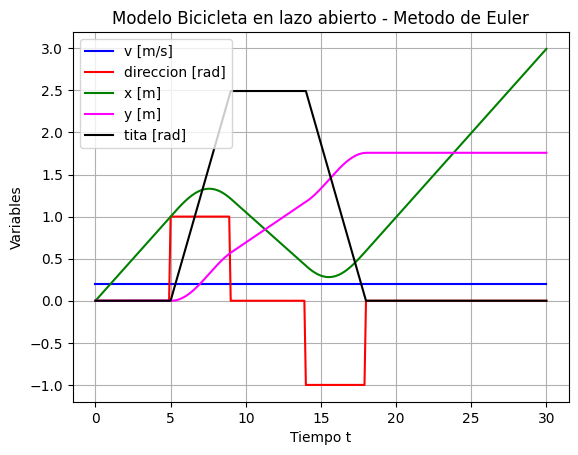

In [14]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Initial conditions and parameters
x0 = 0
y0 = 0  # Initial value
tita0 = 0
t0 = 0  # Start time
tn = 30  # End time
dt = 0.1  # Time step

l=0.5 # lenght of the robot


n_steps = int((tn - t0) / dt)
t_values = np.linspace(t0, tn, n_steps + 1)

#command vector
speed=0.2
v_values = speed*np.ones(n_steps + 1)

# Define the lengths of each section
time_start=5
num_zeros_start = int(time_start/dt)  # Number of zeros at the start
time_turn=4
num_ones = int(time_turn/dt)         # Number of ones in the middle
num_zeros_end = len(t_values)-2*num_zeros_start-2*num_ones    # Number of zeros at the end
delta_values = np.concatenate((np.zeros(num_zeros_start),np.ones(num_ones),np.zeros(num_zeros_start),(-1)*np.ones(num_ones),np.zeros(num_zeros_end)))

# Euler method implementation

x_values = np.zeros(n_steps + 1)
y_values = np.zeros(n_steps + 1)
tita_values = np.zeros(n_steps + 1)

x_values[0] = x0
y_values[0] = y0
tita_values[0] = tita0

for i in range(1, n_steps + 1):
    x_values[i] = x_values[i - 1] + v_values[i-1]*m.cos(tita_values[i-1])*dt
    y_values[i] = y_values[i - 1] + v_values[i-1]*m.sin(tita_values[i-1])*dt
    R_inv = m.tan(delta_values[i-1]) / l # inverse, to avoid dividing by zero when delta = 0
    tita_values[i] = tita_values[i - 1] + (v_values[i-1] * R_inv) * dt

# Plotting the results
plt.plot(t_values,v_values , label='v [m/s]', color='blue')
plt.plot(t_values,delta_values , label='direccion [rad]', color='red')
plt.plot(t_values,x_values , label='x [m]', color='green')
plt.plot(t_values,y_values , label='y [m]', color='magenta')
plt.plot(t_values,tita_values , label='tita [rad]', color='black')
plt.title('Modelo Bicicleta en lazo abierto - Metodo de Euler')
plt.xlabel('Tiempo t')
plt.ylabel('Variables')
plt.legend()
plt.grid()
plt.show()


Ejemplo de grafico con movimiento (correr fuera de notebook).


/home/glpuga/workspace/TP 3/.venv/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


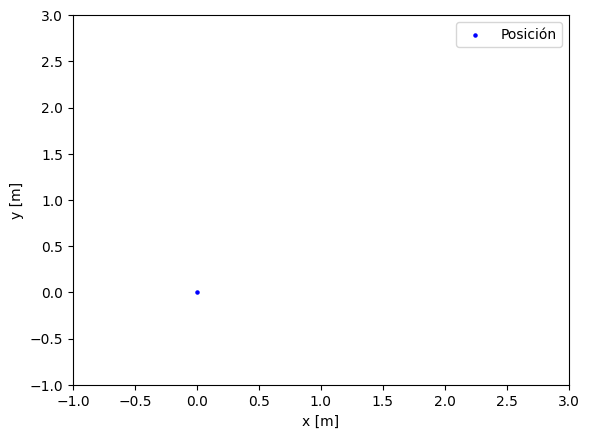

In [15]:
#Ejemplo de grafico con movimiento correr fuera de notebook.

import numpy as np
import math as m
import matplotlib.pyplot as plt

import matplotlib.animation as animation

# Initial conditions and parameters
x0 = 0
y0 = 0  # Initial value
tita0 = 0
t0 = 0  # Start time
tn = 30  # End time
dt = 0.1  # Time step

l=0.2 # lenght of the robot


n_steps = int((tn - t0) / dt)
t_values = np.linspace(t0, tn, n_steps + 1)

#command vector
speed=0.1
v_values = speed*np.ones(n_steps + 1)

# Define the lengths of each section
time_start=5
num_zeros_start = int(time_start/dt)  # Number of zeros at the start
time_turn=2
num_ones = int(time_turn/dt)         # Number of ones in the middle
num_zeros_end = len(t_values)-2*num_zeros_start-2*num_ones    # Number of zeros at the end
delta_values = np.concatenate((np.zeros(num_zeros_start),np.ones(num_ones),np.zeros(num_zeros_start),(-1)*np.ones(num_ones),np.zeros(num_zeros_end)))

# Euler method implementation

x_values = np.zeros(n_steps + 1)
y_values = np.zeros(n_steps + 1)
tita_values = np.zeros(n_steps + 1)

x_values[0] = x0
y_values[0] = y0
tita_values[0] = tita0

for i in range(1, n_steps + 1):
    x_values[i] = x_values[i - 1] + v_values[i-1]*m.cos(tita_values[i-1])*dt
    y_values[i] = y_values[i - 1] + v_values[i-1]*m.sin(tita_values[i-1])*dt
    tita_values[i] = tita_values[i - 1] + (v_values[i-1]/l)*m.tan(delta_values[i-1])*dt


# grafico movimiento:

fig, ax = plt.subplots()

#configuro visualizacion
scat = ax.scatter(x_values[0], y_values[0], c="b", s=5, label=f'Posición')

#configuro ejes
ax.set(xlim=[-1, 3], ylim=[-1, 3], xlabel='x [m]', ylabel='y [m]')
ax.legend()


def update(frame):
    x = x_values[:frame]
    y = y_values[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    return (scat)

ani = animation.FuncAnimation(fig=fig, func=update, frames=300, interval=1)
plt.show()


Ejemplo control de posicion lazo cerrado:

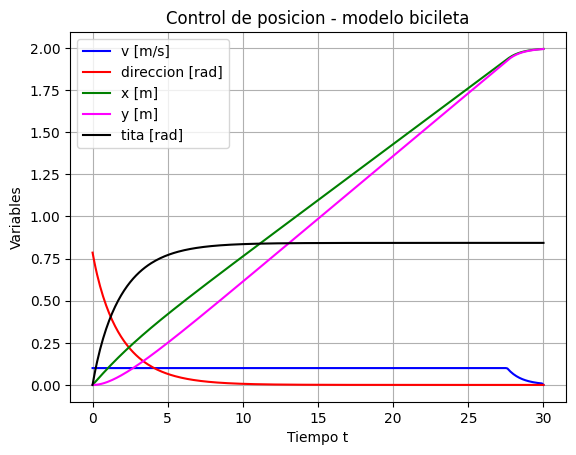

In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

# Initial conditions and parameters
x0 = 0
y0 = 0  # Initial value
tita0 = 0
t0 = 0  # Start time
tn = 30  # End time
dt = 0.1  # Time step
l=0.2 # lenght of the robot

#posicion deseada
xd=2 
yd=2

n_steps = int((tn - t0) / dt)
t_values = np.linspace(t0, tn, n_steps + 1)

#command vector
v_values = np.zeros(n_steps + 1)
v_values[0]=0 #initial speed
delta_values = np.zeros(n_steps + 1)
delta_values[0]=0 #initial speed

# control parameters
kv=1
kh=1
vsat=.1 #saturacion velocidad
# Euler method implementation

x_values = np.zeros(n_steps + 1)
y_values = np.zeros(n_steps + 1)
tita_values = np.zeros(n_steps + 1)

x_values[0] = x0
y_values[0] = y0
tita_values[0] = tita0

for i in range(1, n_steps + 1):
    #control
    v_values[i-1]=kv*m.sqrt((xd-x_values[i-1])**2+(yd-y_values[i-1])**2)

    if v_values[i-1]>vsat:
        v_values[i-1]=vsat
    elif v_values[i-1]<-vsat:
        v_values[i-1]=-vsat

    delta_values[i-1]=kh*(m.atan2(yd-y_values[i-1],xd-x_values[i-1])-tita_values[i-1])
    #model
    x_values[i] = x_values[i - 1] + v_values[i-1]*m.cos(tita_values[i-1])*dt
    y_values[i] = y_values[i - 1] + v_values[i-1]*m.sin(tita_values[i-1])*dt
    tita_values[i] = tita_values[i - 1] + (v_values[i-1]/l)*m.tan(delta_values[i-1])*dt

# Plotting the results
plt.plot(t_values,v_values , label='v [m/s]', color='blue')
plt.plot(t_values,delta_values , label='direccion [rad]', color='red')
plt.plot(t_values,x_values , label='x [m]', color='green')
plt.plot(t_values,y_values , label='y [m]', color='magenta')
plt.plot(t_values,tita_values , label='tita [rad]', color='black')
plt.title('Control de posicion - modelo bicileta')
plt.xlabel('Tiempo t')
plt.ylabel('Variables')
plt.legend()
plt.grid()
plt.show()